In [22]:
import numpy as np
import pandas as pd
from scipy import integrate
from scipy import stats
import dabest
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
my_color_palette =  {'Dz 1mg/kg':'#663399','Dz 3mg/kg':'#4AB2D6','Dz 5mg/kg':'#8FB996','Dz 7mg/kg':'#006594','NaCl':'#594157', 'PTZ 20mg/kg':'#c7991a'}

In [29]:
# Load data
All_NMF_IOC_df = pd.read_pickle('Mice_data/'+'All_NMF_IOC_df')
cnd_order = ['NaCl','Dz 7mg/kg','Dz 5mg/kg','Dz 3mg/kg','Dz 1mg/kg','PTZ 20mg/kg']

In [30]:
print(All_NMF_IOC_df)

             Filename  Difference AUC  Condition  Difference TTSZ [s]
0    Ent_CamK2_03_S02        0.166338  Dz 5mg/kg                  3.0
1    Ent_CamK2_03_S03        0.000000       NaCl                  0.0
2    Ent_CamK2_03_S04        0.000000       NaCl                  0.0
3    Ent_CamK2_03_S05        0.102779  Dz 5mg/kg                  5.0
4    Ent_CamK2_03_S08        0.000000       NaCl                  0.0
..                ...             ...        ...                  ...
125  Ent_CamK2_58_S10       -0.282747  Dz 7mg/kg                  5.0
126  Ent_CamK2_58_S11       -0.257018  Dz 3mg/kg                  1.5
127  Ent_CamK2_58_S12        0.000000       NaCl                  0.0
128  Ent_CamK2_58_S13       -0.114095  Dz 1mg/kg                  1.0
129  Ent_CamK2_58_S14       -0.271219  Dz 5mg/kg                  3.0

[130 rows x 4 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dabest/plotter.py:389: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  rawdata_plot = sns.swarmplot(data=plot_data, x=xvar, y=yvar,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 55.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dabest/plotter.py:438: UserWarning: FixedFormatter should only be used together with FixedLocator
  rawdata_axes.set_xticklabels(ticks_with_counts)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 60.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


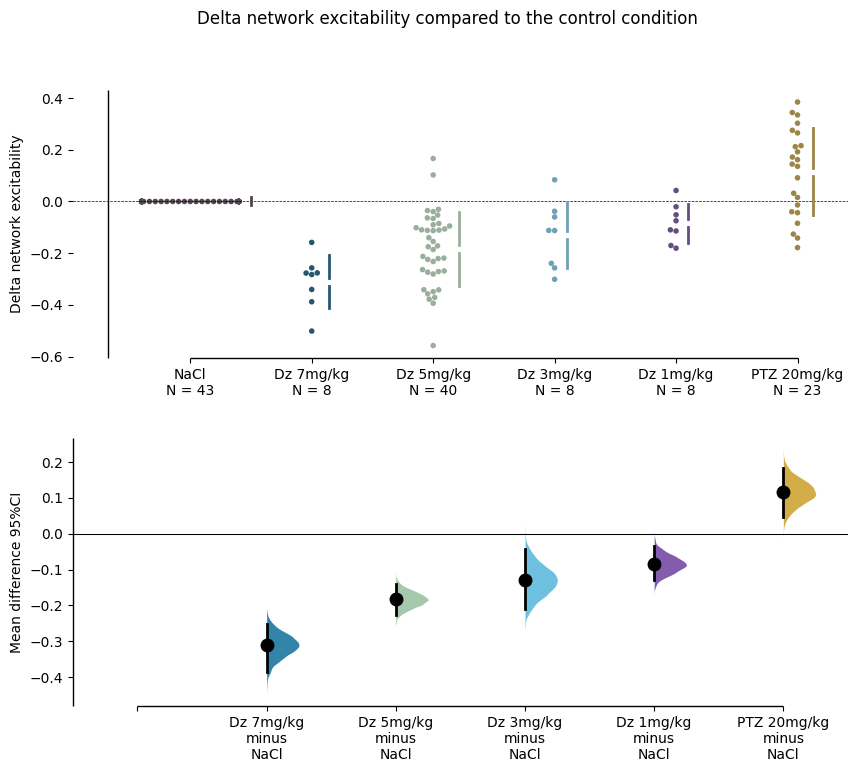

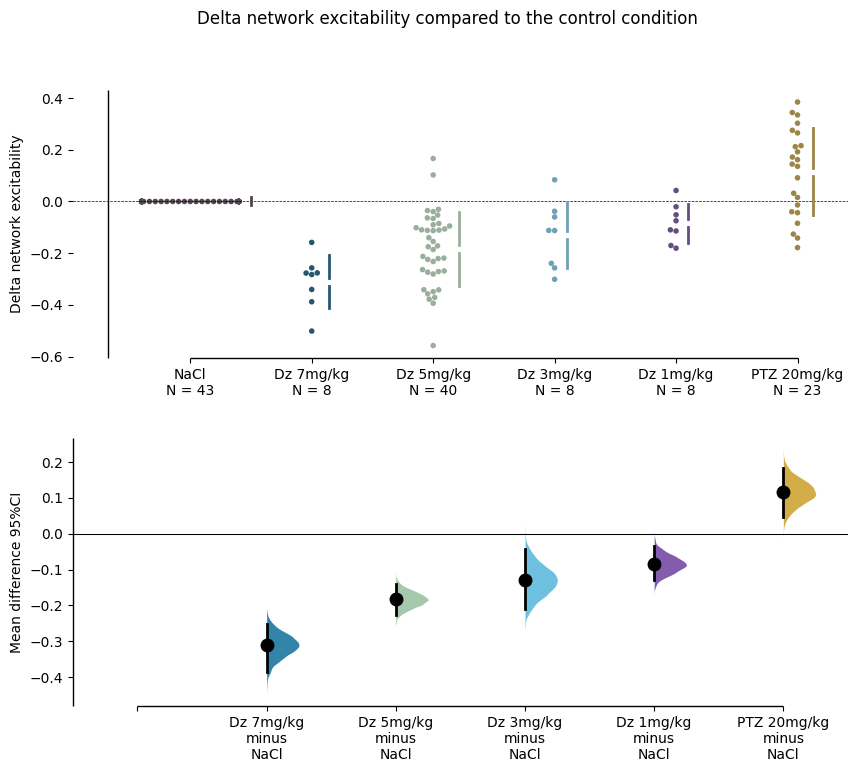

In [31]:
mulit_groupe_norm = dabest.load(All_NMF_IOC_df, idx= cnd_order, x="Condition", y='Difference AUC')
title = "Delta network excitability compared to the control condition"
fig2 = plt.figure(title, figsize=(10, 8)).suptitle(title)
gridspec.GridSpec(12, 12)
ax = plt.subplot2grid((12, 12), (0, 0), rowspan=12, colspan=12)
ax.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
mulit_groupe_norm.mean_diff.plot(ax=ax,custom_palette=my_color_palette,raw_marker_size=4,swarm_label="Delta network excitability",contrast_label="Mean difference 95%CI")

Text(-0.2, 14.0, 'r2=0.20, p=9e-08')

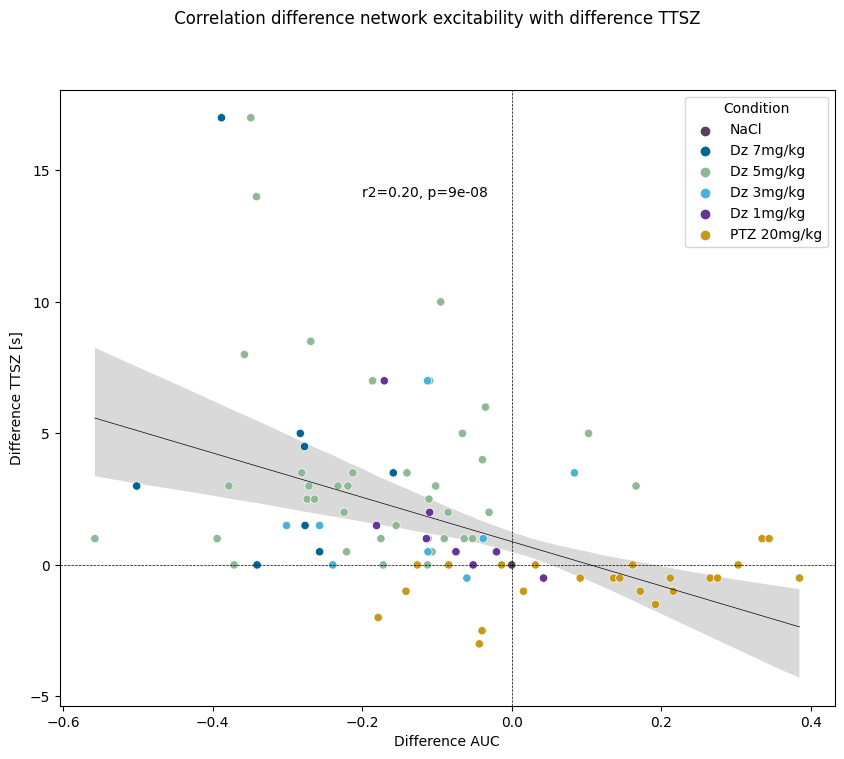

In [32]:
title = " Correlation difference network excitability with difference TTSZ"
fig1 = plt.figure(title, figsize=(10, 8)).suptitle(title)
gridspec.GridSpec(12, 12)
ax1 = plt.subplot2grid((12, 12), (0, 0), rowspan=12, colspan=12)
sns.regplot(ax=ax1, data=All_NMF_IOC_df,  x='Difference AUC',y='Difference TTSZ [s]', scatter=False, color='k',line_kws={'linewidth': 0.5})
sns.scatterplot(ax=ax1, data=All_NMF_IOC_df, x='Difference AUC',y='Difference TTSZ [s]',  hue='Condition',hue_order=cnd_order, palette=my_color_palette, zorder=1)
ax1.axvline(x=0, color='k', linestyle='--', linewidth=0.5)
ax1.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
# ax1.set_ylim(bottom=0)

nas = np.logical_or(All_NMF_IOC_df['Difference TTSZ [s]'].isnull(), All_NMF_IOC_df['Difference AUC'].isnull())
r, p = stats.pearsonr(All_NMF_IOC_df['Difference TTSZ [s]'][~nas], All_NMF_IOC_df['Difference AUC'][~nas])
r2 = r**2
ax1.text(-0.2, np.max(All_NMF_IOC_df['Difference TTSZ [s]'])-3,'r2={:.2f}, p={:.0e}'.format(r2, p))